**Problema 7.6.**  La Figura presenta datos experimentales reales sobre el número de desintegraciones ΔN del π mesón en función del tiempo, el tiempo se ha "agrupado" en intervalos Δt = 10 ns y la curva suave es la disminución exponencial teórica esperada para números muy grandes de piones. Su problema es deducir la vida útil τ del mesón π a partir de estos datos (la vida útil tabulada del pión es 2.6 × 10−8 s).
 
 <img src= 'Curva_teorica.PNG'>
 
 
 La función analítica que describe el decaimiento puede ser encontrada partiendo de la siguiente ecuación diferencial:
 
 \begin{equation}
 \frac{dN}{dt}=-\frac{1}{\tau}N(t) 
 \end{equation}
 
 
 \begin{equation}
 \frac{dN}{N}=-\frac{dt}{\tau}   
 \end{equation}
 
 \begin{equation}
 \int \frac{dN}{N}=\int -\frac{dt}{\tau}  
 \end{equation}
 
 \begin{equation} 
 ln(N)=-\frac{t}{\tau }+N_{0}      
 \end{equation}
 
 \begin{equation}
 e^{N}=e^{-\frac{t}{\tau }+N_{o}}  \rightarrow  N(t)=N_{o}e^{-\frac{t}{\tau}}   
 \end{equation}

In [1]:
from numpy import loadtxt, log, sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

En principio extraemos  los datos de los archivos de texto y graficamos el número de decaimientos en función del tiempo para corroborar que se corresponden con los puntos de la grafica experimental

In [2]:
data1 = loadtxt('pion_decay_rubin.dat')
data2= loadtxt('decayPiMeson.dat')

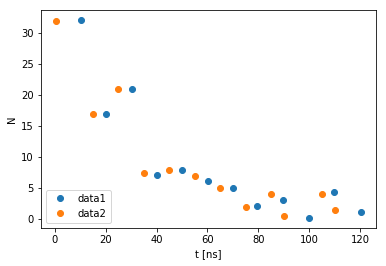

In [3]:
plt.plot(data1[:,0], data1[:,1], 'o', label='data1')
plt.plot(data2[:,0], data2[:,1], 'o',label='data2')
legend(loc='lower left')
plt.xlabel('t [ns]')
plt.ylabel('N')
plt.show()

Ahora graficaremos los datos del logaritmo de N en función del tiempo, para optener una función lineal análoga a:

\begin{equation} 
ln(N)=N_{0} -\frac{t}{\tau }     
\end{equation}

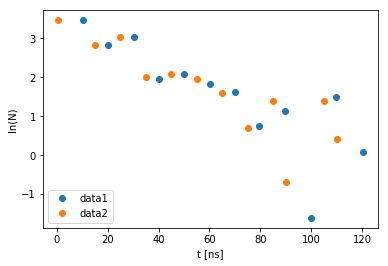

In [4]:
plt.plot(data1[:,0], log(data1[:,1]),'o', label='data1')
plt.plot(data2[:,0], log(data2[:,1]),'o',label='data2')
plt.xlabel('t [ns]')
plt.ylabel('ln(N)')
legend(loc='lower left')
plt.show()

Usando el método de regresión lineal por mínimos cuadrado hayamos la recta que se ajusta a los datos

In [5]:
def Mincu(dat):
    n = len(dat[:,0])
    err = sqrt(n)
    
    s = 0
    sx = 0
    sy = 0
    sxx = 0
    sxy = 0
    delta = 0

    for i in range(n):
        s += 1/(err*err)
        sx += dat[i,0]
        sy += log(dat[i,1])
        sxx += (dat[i,0]*dat[i,0] )   
        sxy += (dat[i,0]*log(dat[i,1]) )
    
    sx /= (err*err)
    sy /= (err*err)
    sxx /= (err*err)
    sxy /= (err*err)

    delta = s*sxx - (sx*sx)

    b = (sxx*sy - sx*sxy) / delta  #intercepto
    a = (s*sxy - sx*sy) / delta    #pendiente

    return a,b

Con los datos de la regresión lineal encontramos los parámetros de una recta: la pendiente a y el intercepto b, con los cuales definimos una función lineal y  la graficamos junto con los datos.

\begin{equation} 
y=b+ax 
\end{equation} 

In [6]:
a1,b1=Mincu(data1)
a2,b2=Mincu(data2)

print("a1=", a1,"[ns]^-1")
print("b1=", b1,)
print("a2=", a2,"[ns]^-1")
print("b2=", b2,)

Y1 = [ (a1*i+b1) for i in data1[:,0] ]
Y2 = [ (a2*i+b2) for i in data2[:,0] ]


a1= -0.03159701673833026 [ns]^-1
b1= 3.611024907430632
a2= -0.028120744167616542 [ns]^-1
b2= 3.334200262407691


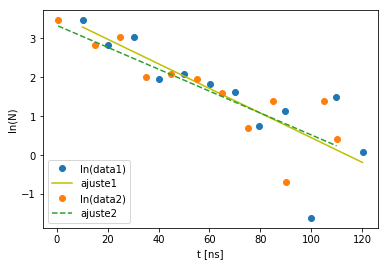

In [7]:
plt.plot(data1[:,0], log(data1[:,1]), 'o', label="ln(data1)")
plt.plot(data1[:,0], Y1, 'y-', label="ajuste1")
plt.plot(data2[:,0], log(data2[:,1]), 'o' , label="ln(data2)")
plt.plot(data2[:,0], Y2, '--', label="ajuste2")
plt.xlabel('t [ns]')
plt.ylabel('ln(N)')
legend(loc='lower left')
plt.show()

Para hallar el valor de tao podemos comprar ambas ecuaciones y observar que tao debería corresponde al inverso de la pendiente  de la función hallada con la regresión lineal


\begin{equation} 
ln(N)=N_{0}-\frac{t}{\tau }      
\end{equation}

\begin{equation} 
Y=b+ax    
\end{equation}

\begin{equation} 
  \tau= - \frac{1}{a}   
\end{equation}

In [8]:
tao1=-(1/a1)*1e-9
tao2=-(1/a2)*1e-9
print("tao1=",tao1,"segundos")
print("tao2=",tao2,"segundos")

Tteo= 2.6*1e-8

Er1= abs((Tteo-tao1)/Tteo)*100
Er2= abs((Tteo-tao2)/Tteo)*100

print("error1=",Er1,"%")
print("error1=",Er2,"%")

tao1= 3.164855746608833e-08 segundos
tao2= 3.556093658259536e-08 segundos
error1= 21.725221023416655 %
error1= 36.77283300998214 %


Ahora vamos a ajustar los datos a una curva exponencial haciendo uso de la función curve_fit

In [9]:
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from numpy import exp as npexp

def f_exp(x, m, n):
    return n*npexp(m*x)

popt1, pcov1 = curve_fit(f_exp, data1[:,0], data1[:,1],[0,0])
popt2, pcov2 = curve_fit(f_exp, data2[:,0], data2[:,1],[0,0])

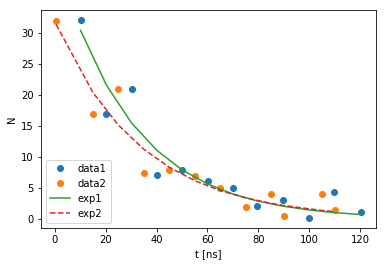

In [10]:
plt.plot(data1[:,0], data1[:,1], 'o', label="data1")
plt.plot(data2[:,0], data2[:,1], 'o', label="data2")
plt.plot(data1[:,0], f_exp(data1[:,0], *popt1), label="exp1")
plt.plot(data2[:,0], f_exp(data2[:,0], *popt2), '--',label="exp2")
plt.xlabel('t [ns]')
plt.ylabel('N')
legend(loc='lower left')
plt.show()
plt.show()

Podemos de calcular el valor de tao comparando las ecuaciones exponenciales 

\begin{equation}
 N(t)=N_{o}e^{-\frac{t}{\tau}}   
\end{equation}

\begin{equation}
 Y=be^{mx}   
\end{equation}

entonces:

\begin{equation}
 \tau=-\frac{1}{m} 
\end{equation}

In [14]:
m1=popt1[0] # valor optimo del parametro m 
tao3=(-1/m1)*1e-9
m2=popt2[0] 
tao4=(-1/m2)*1e-9
print("tao3=",tao3,"segundos")
print("tao4=",tao4,"segundos")

tao3= 2.9742770853746504e-08 segundos
tao4= 3.364653150794722e-08 segundos


In [16]:
Er3= abs((Tteo-tao3)/Tteo)*100
Er4= abs((Tteo-tao4)/Tteo)*100
print("error3=",Er3,"%")
print("error4=",Er4,"%")

error3= 14.395272514409625 %
error4= 29.409736569027757 %
